In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
df = pd.read_csv('winequality-red.csv')
# df.describe()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [100]:
#проверяем количество пустых яйчеек
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [101]:
#проверяем количество уникальных отметок качества
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

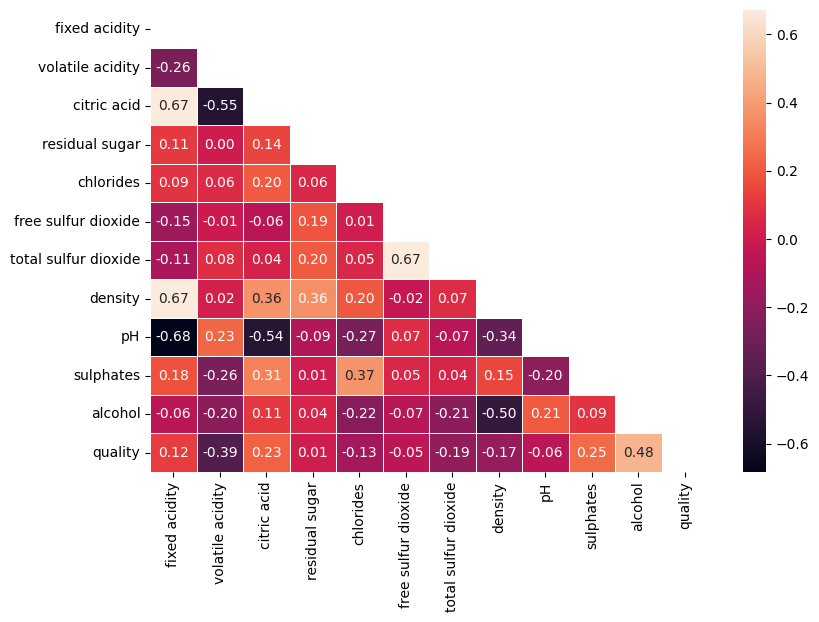

In [102]:
corr = df.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, mask=np.triu(corr))
plt.show()

In [103]:
#Следовательно лучшая корелляция между 
# 1) citeic acid & flex acidity
# 2) density & flex_acidity
# 3) total sulfor dioxide & free sulfor dioxide 

In [104]:
#заменим 
data = df.replace({'quality' : {8 : 'good',7 : 'good',6 : 'ok',5 : 'ok',4 : 'bad',3 : 'bad',}})

In [105]:
#выделяем два класса 
X_temp = df.drop(columns='quality')
y = df.quality
#нормализуем значение,чтобы уменшить эффект больших значений
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,0.329171,0.154079,0.000000,0.221239,0.292035,0.407080,1.000000
volatile acidity,1599.000000,0.279329,0.122644,0.000000,0.184932,0.273973,0.356164,1.000000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,0.112247,0.096570,0.000000,0.068493,0.089041,0.116438,1.000000
chlorides,1599.000000,0.125988,0.078573,0.000000,0.096828,0.111853,0.130217,1.000000
free sulfur dioxide,1599.000000,0.209506,0.147326,0.000000,0.084507,0.183099,0.281690,1.000000
total sulfur dioxide,1599.000000,0.142996,0.116238,0.000000,0.056537,0.113074,0.197880,1.000000
density,1599.000000,0.490211,0.138571,0.000000,0.406021,0.490455,0.570117,1.000000
pH,1599.000000,0.449695,0.121564,0.000000,0.370079,0.448819,0.519685,1.000000
sulphates,1599.000000,0.196496,0.101501,0.000000,0.131737,0.173653,0.239521,1.000000


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [145]:
#дерево решений 
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1)) }

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)

# print('Tuned hyper parameters : ', tree_cv.best_params_)
# print('accuracy : ', tree_cv.best_score_)

C:\Users\Иван\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


In [146]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [148]:
#kNN
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

# print('Tuned hyper parameters : ', knn_cv.best_params_)
# print('accuracy : ', knn_cv.best_score_)

C:\Users\Иван\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


In [149]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [151]:
# теперь сравним полученные результаты с помощью различных метрик

In [162]:
# Accuracy (точность)
from sklearn.metrics import accuracy_score
# Предсказания модели kNN
y_pred_knn = knn_cv.predict(X_test)

# Предсказания модели дерева решений
y_pred_tree = tree.predict(X_test)

# Вычисление точности
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Accuracy (kNN):", accuracy_knn)
print("Accuracy (Decision Tree):", accuracy_tree)

Accuracy (kNN): 0.64
Accuracy (Decision Tree): 0.5775


In [ ]:
# kNN и Дерево решений обеспечивают высокую точность, но лучший выбор зависит от особенностей данных.
# По результатам выше можно сделать вывод что для приведенного набора данных более точным оказывается метод ближайшего соседа

In [163]:
# Precision, Recall, F1-score (точность, полнота, F-мера)
from sklearn.metrics import precision_recall_fscore_support
# Вычисление precision, recall и f1-score для kNN
precision_knn, recall_knn, f1_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average=None, zero_division=1)
 
# Вычисление precision, recall и f1-score для дерева решений
precision_tree, recall_tree, f1_tree, _  = precision_recall_fscore_support(y_test, y_pred_tree, average=None, zero_division=1)

print("Precision (kNN):", precision_knn)
print("Recall (kNN):", recall_knn)
print("F1-score (kNN):", f1_knn)

print("Precision (Decision Tree):", precision_tree)
print("Recall (Decision Tree):", recall_tree)
print("F1-score (Decision Tree):", f1_tree)

Precision (kNN): [1.         1.         0.70658683 0.62702703 0.47826087 0.        ]
Recall (kNN): [0.         0.         0.69822485 0.68235294 0.55       0.        ]
F1-score (kNN): [0.         0.         0.70238095 0.65352113 0.51162791 1.        ]
Precision (Decision Tree): [1.         0.14285714 0.65644172 0.62658228 0.37096774 0.        ]
Recall (Decision Tree): [0.         0.14285714 0.63313609 0.58235294 0.575      0.        ]
F1-score (Decision Tree): [0.         0.14285714 0.64457831 0.60365854 0.45098039 1.        ]


In [ ]:
# Recall может варьироваться в зависимости от структуры данных. kNN может быть более эффективным в случаях, где границы классов сложны,как в данном примере
# Оба метода могут предоставлять высокий Precision, но Дерево решений, как правило, лучше справляется с проблемой дисбаланса классов.
# Оба метода могут обеспечивать высокое значение F-measure, но лучший выбор будет зависеть от баланса между Precision и Recall, который необходим для конкретной задачи.

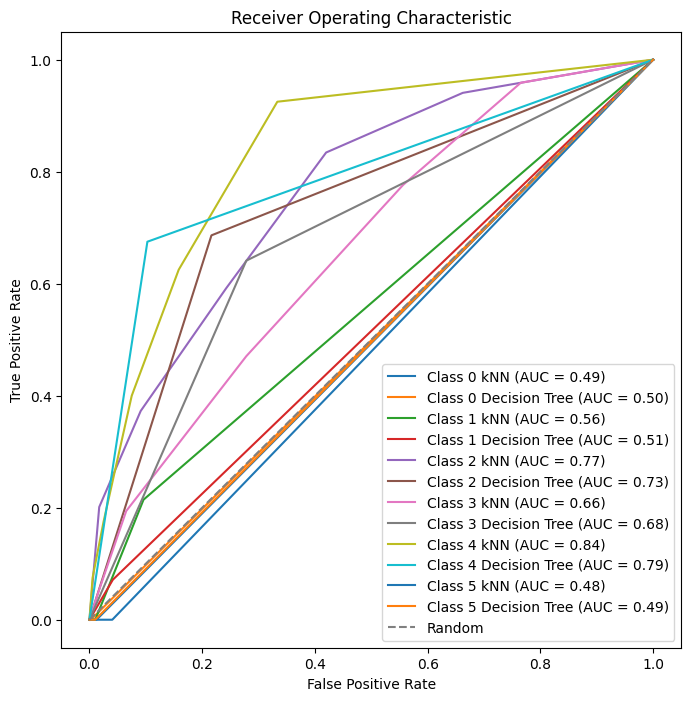

In [167]:
#ROC-AUC (площадь под ROC-кривой)
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Обучение kNN
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn.fit(X_train, y_train_bin)
y_score_knn = knn.predict_proba(X_test)

# Обучение дерева решений
tree = OneVsRestClassifier(DecisionTreeClassifier())
tree.fit(X_train, y_train_bin)
y_score_tree = tree.predict_proba(X_test)

# Рассчитываем ROC-кривые и площади под ними для каждого класса
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(len(np.unique(y_test))):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

fpr_tree = dict()
tpr_tree = dict()
roc_auc_tree = dict()
for i in range(len(np.unique(y_test))):
    fpr_tree[i], tpr_tree[i], _ = roc_curve(y_test_bin[:, i], y_score_tree[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

# Построение ROC-кривых для каждого класса
plt.figure(figsize=(8, 8))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'Class {i} kNN (AUC = {roc_auc_knn[i]:.2f})')
    plt.plot(fpr_tree[i], tpr_tree[i], label=f'Class {i} Decision Tree (AUC = {roc_auc_tree[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# kNN и Дерево решений предоставляют хорошие значения ROC-кривой, но выбор лучшего метода зависит от того, какие ошибки считать более критичными для конкретного набора данных.
# сли важна точность предсказаний и данные содержат сложные нелинейные отношения, kNN может быть предпочтительным выбором.
# Если важна интерпретируемость модели и эффективное справление с дисбалансом классов, Дерево решений может быть более подходящим.
# Каждый из методов имеет свои преимущества и ограничения, и выбор между ними должен зависеть от конкретной задачи и характеристик данных.